Одна з найбільш поширених **проблем**, що зустрічаються в computer science - це проблема сортування якогось набору даних.

Сортування - одна з найкраще вивчених областей CS і це має ефект в тому числі на те, що вам майже ніколи не доведеться реалізовувати свої алгоритми сортування. Але важливо розуміти деякі властивості цього класу алгоритмів, щоб навіть з готових імплементацій обрати правильну.

Також, алгоритми сортування іноді є прекрасним ілюстративним прикладом для **дизайну алгоритмів**.

In [120]:
SIZE = 1000

In [121]:
original_lst = list(range(SIZE))

In [122]:
import random

Перший алгоритм сортування, що ми розглянемо, називається selection sort.
Він влаштований дуже просто: два вкладених цикли порівнюють елементи між собою. 
В кінці другого цикла найменший елемент та елемент з першого цикла міняють місцям.

Асимптотична складність:

* Найгірший випадок: O(n**2)
* Найкращий випадок: O(n**2)
* Середній випадок: O(n**2)

[Народний танок в якості ілюстрації](https://youtu.be/0-W8OEwLebQ?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

In [123]:
def selection_sort(arr):
    size = len(arr)
    for i in range(size):
        min = i
        for j in range(i, size):
            if arr[j] < arr[min]:
                min = j
        arr[i], arr[min] = arr[min], arr[i]

In [124]:
random.shuffle(original_lst)
print(original_lst)
selection_sort(original_lst)
print(original_lst)

[148, 837, 770, 138, 818, 740, 230, 667, 314, 762, 303, 363, 43, 483, 843, 134, 75, 339, 214, 295, 570, 350, 262, 5, 885, 521, 70, 858, 630, 559, 146, 403, 512, 17, 228, 573, 273, 514, 862, 130, 401, 511, 91, 441, 522, 423, 9, 120, 381, 881, 88, 378, 992, 108, 143, 703, 376, 373, 235, 716, 221, 474, 541, 906, 470, 799, 806, 68, 947, 77, 714, 486, 292, 776, 746, 534, 509, 357, 121, 100, 833, 260, 90, 643, 411, 265, 177, 808, 985, 149, 200, 24, 296, 578, 856, 207, 150, 844, 654, 57, 996, 689, 64, 548, 387, 197, 645, 109, 476, 931, 870, 129, 835, 25, 604, 955, 35, 809, 202, 608, 351, 629, 440, 605, 901, 168, 974, 371, 294, 65, 791, 482, 826, 393, 342, 787, 792, 319, 876, 307, 493, 229, 546, 893, 767, 365, 436, 847, 69, 899, 318, 861, 255, 169, 163, 432, 857, 507, 750, 59, 851, 661, 31, 729, 961, 759, 286, 345, 591, 94, 344, 924, 27, 58, 533, 879, 699, 960, 297, 802, 384, 919, 752, 713, 89, 976, 176, 691, 145, 838, 396, 317, 263, 366, 450, 872, 783, 693, 660, 747, 232, 828, 106, 865, 156, 

In [125]:
%%timeit

random.shuffle(original_lst)
selection_sort(original_lst)

13.5 ms ± 422 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [126]:
import random

from time import time
from functools import partial
from typing import Callable, Union, List, Iterable


def function_timer(function: Callable):
    start_time = time()
    function()
    return time() - start_time

def time_algs_by_mean(func: Callable, 
                      test_num: int, 
                      range_bounds: List[int], 
                      type_constr: type = list,
                      preparation: Callable = lambda arr: arr) -> List[float]:
    algorith_times = list()
    for range_bound in range_bounds:
        arr = preparation(type_constr(range(range_bound)))
        times_for_n: List[float] = [function_timer(
        partial(func,
                arr = arr,)
        ) for _ in range(test_num)]
        mean_running_time = sum(times_for_n)/len(times_for_n)
        algorith_times.append(mean_running_time)
    return algorith_times

In [127]:
def shuffle_pure_func(arr):
    random.shuffle(arr)
    return arr

def reverse_arr(arr):
    return arr[::-1]

In [128]:
RANGE_BOUND_MAX = 200
TESTS_NUM = 100

range_bounds = list(range(10, RANGE_BOUND_MAX))

selection_times: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)
selection_times_reverse: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list, reverse_arr)
selection_times_already_sorted: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list)

In [129]:
import matplotlib.pyplot as plt

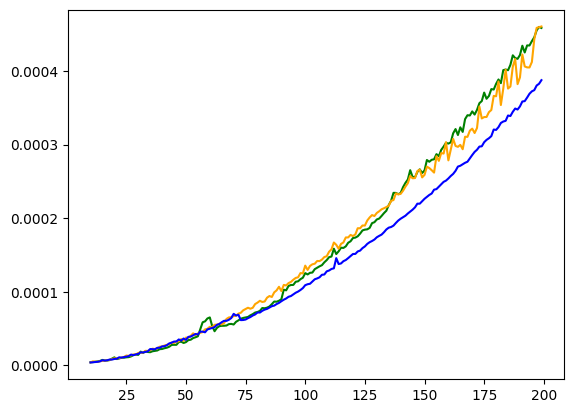

In [130]:
plt.plot(range_bounds, selection_times, color = "green")
plt.plot(range_bounds, selection_times_reverse, color = "orange")
plt.plot(range_bounds, selection_times_already_sorted, color = "blue")

Наступний алгоритм - insertion sort. За принципом роботи він схожий на перемішування карт у руці.

Асимптотична складність:

* Найгірший випадок: O(n**2)
* Найкращий випадок: O(n)
* Середній випадок: O(n**2)

[Народний танок для ілюстрації алгоритму](https://youtu.be/EdIKIf9mHk0?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

In [131]:
def insertion_sort(arr):
    size = len(arr)
    for i in range(1, size):
        j = i - 1
        key = arr[i]
        while arr[j] > key and j >= 0:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [132]:
random.shuffle(original_lst)
print(original_lst)
insertion_sort(original_lst)
print(original_lst)

[992, 141, 613, 833, 725, 580, 759, 321, 863, 854, 851, 542, 252, 344, 246, 701, 795, 671, 835, 687, 9, 377, 997, 495, 800, 433, 298, 842, 632, 848, 537, 241, 827, 882, 606, 813, 176, 686, 250, 6, 12, 540, 278, 869, 922, 99, 403, 153, 426, 310, 941, 301, 393, 339, 287, 927, 135, 296, 816, 772, 394, 658, 160, 879, 355, 149, 665, 630, 87, 581, 596, 155, 777, 105, 908, 59, 831, 573, 656, 699, 532, 850, 682, 809, 487, 754, 20, 928, 805, 901, 33, 431, 17, 952, 211, 766, 5, 476, 811, 881, 693, 904, 740, 395, 531, 316, 382, 876, 115, 179, 629, 730, 67, 733, 720, 837, 593, 133, 749, 156, 271, 867, 322, 248, 512, 230, 808, 11, 627, 482, 212, 447, 489, 373, 474, 231, 424, 35, 799, 898, 838, 648, 497, 347, 735, 942, 333, 368, 607, 635, 95, 539, 340, 936, 709, 778, 523, 420, 769, 441, 631, 678, 312, 100, 198, 977, 953, 488, 180, 738, 466, 8, 570, 311, 931, 78, 62, 945, 970, 794, 410, 201, 734, 852, 50, 413, 566, 556, 601, 746, 163, 790, 210, 812, 274, 219, 889, 384, 602, 23, 481, 242, 402, 367, 98

In [133]:
%%timeit

random.shuffle(original_lst)
insertion_sort(original_lst)

11.8 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [134]:
RANGE_BOUND_MAX = 200
TESTS_NUM = 1000

range_bounds = list(range(10, RANGE_BOUND_MAX))

In [135]:
insertion_times: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)
insertion_times_reverse: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)
insertion_times_already_sorted: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

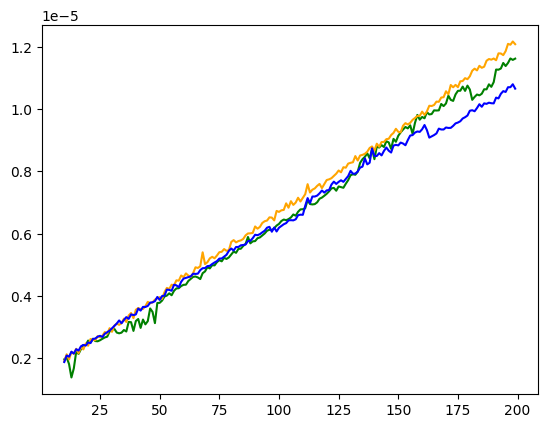

In [136]:
plt.plot(range_bounds, insertion_times, color = "green")
plt.plot(range_bounds, insertion_times_reverse, color = "orange")
plt.plot(range_bounds, insertion_times_already_sorted, color = "blue")

In [137]:
RANGE_BOUND_START = 10
RANGE_BOUND_MAX = 1000
TESTS_NUM = 50

range_bounds = list(range(RANGE_BOUND_START, RANGE_BOUND_MAX))

In [138]:
insertion_times_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)


In [139]:
insertion_times_reverse_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [140]:
insertion_times_already_sorted_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

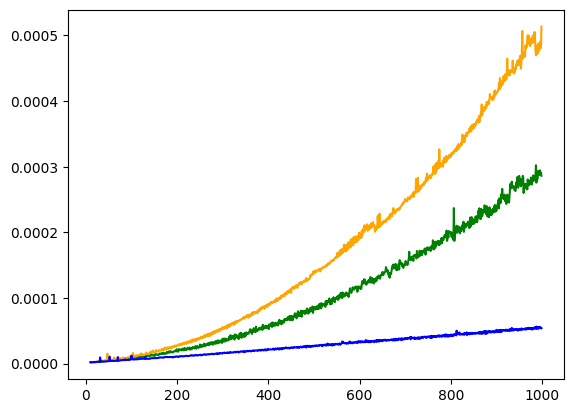

In [141]:
plt.plot(range_bounds, insertion_times_big_arr, color = "green")
plt.plot(range_bounds, insertion_times_reverse_big_arr, color = "orange")
plt.plot(range_bounds, insertion_times_already_sorted_big_arr, color = "blue")

Сортування вставками має декілька важливих властивостей:

* Це in-place алгоритм (споживає тільки О(1) пам'яті). Це ж поширюється і на selection sort.
* Це стабільний алгоритм (якщо ви відсортуєте список об'єктів спочатку за одним полем, а потім за іншим, порядок, встановлений за першим полем, буде збережено)
* Це онлайн-алгоритм (він здатен сортувати без отримання всього набору елементів за раз)
* Цей алгоритм працює за **лінійний час** на так званих частково відсортованих послідовностях (вона є такою, якщо елемент знаходиться не більше ніж у k позиціях від істиної). Повна оцінка тоді буде O(k*n)

Сортування вставками іноді використовується як додаткова частина гібридних алгоритмів сортування (наприклад у стандартному алгоритмі сортування Python під назвою Timsort)

Існує узагальнення сортування вставками, що дозволяє порівнювати нам елементи на відстані більше ніж 1. Воно носить назву сортування Шелла.

Асимптотична складність:

* Найгірший випадок - O(n**2)
* Найкращий випадок - O(n*log(n))
* Середній випадок - **невідомий**

[Народний танок для ілюстрації алгоритму](https://youtu.be/yn0EgXHb5jc?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

Власне, сам принцип сортування Шелла базується на порівнянні елементів, що рівновіддалені на деяке число k по індексу. Після проходження до кінця масиву, цей k зменшується певним чином, щоб, в кінці кінців, сталося порівняння кожного елементу з наступним. Відомо, що асимптотична складність сортування Шелла дуже сильно залежить саме від виду цих послідовностей. Для імплементації нижче використана так звана послідовність Кнута.

In [142]:
from typing import List, TypeVar

T = TypeVar("T")


def shell_sort(array_to_sort: List[T]) -> None:
    """From the signature we know that our method does not return anything.
    Basically it performs the side effect: it sorts the variable array_to_sort and treats it as mutable"""
    array_length: int = len(array_to_sort)
    shell_sort_step: int = 1
    # Recursively founding the closest member of Knuths sequence
    while shell_sort_step <= array_length // 3:
        shell_sort_step = 3 * shell_sort_step + 1
    while shell_sort_step > 0:
        # First loop maintains the Shellsort step ascending sequence
        for pointer in range(shell_sort_step, array_length, 1):
            # Second loop maintains the pointer for each h-sorting iterations
            # It's important to maintain the item_to_compare variable as it
            # stores our value for compare with other memmbers of h-sequence
            item_to_compare: T = array_to_sort[pointer]
            for decremented_pointer in range(pointer, 0, -shell_sort_step):
                # Third loop maintains insertion sort with the step value h.
                # It will iterate through the whole array with step h.
                preceeding_item: T = array_to_sort[
                    decremented_pointer - shell_sort_step
                ]
                item: T = array_to_sort[decremented_pointer]
                if preceeding_item > item:
                    # We are doing the swap in the following technique because we need to swap within array
                    array_to_sort[decremented_pointer] = preceeding_item
                    array_to_sort[decremented_pointer - shell_sort_step] = item
                if preceeding_item < item_to_compare:
                    # When we found the item which less than item we compare, we stop the swap process
                    array_to_sort[decremented_pointer] = item_to_compare
                    break
        shell_sort_step = shell_sort_step // 3

In [143]:
random.shuffle(original_lst)
print(original_lst)
shell_sort(original_lst)
print(original_lst)

[457, 49, 303, 384, 813, 176, 288, 839, 496, 912, 517, 972, 882, 635, 717, 604, 863, 563, 340, 8, 375, 184, 295, 533, 442, 469, 334, 498, 693, 896, 991, 712, 34, 955, 328, 208, 818, 535, 724, 37, 412, 147, 926, 487, 499, 568, 968, 109, 831, 541, 695, 790, 837, 733, 914, 128, 205, 115, 552, 530, 254, 222, 917, 611, 835, 486, 750, 763, 44, 497, 170, 473, 998, 344, 951, 528, 748, 585, 263, 895, 705, 700, 478, 650, 670, 828, 171, 870, 780, 63, 674, 898, 419, 385, 268, 549, 548, 890, 350, 509, 596, 663, 925, 420, 92, 417, 357, 389, 807, 301, 804, 764, 816, 161, 113, 435, 597, 418, 66, 224, 93, 954, 307, 524, 567, 83, 393, 211, 470, 365, 229, 842, 736, 523, 754, 450, 151, 98, 124, 445, 46, 413, 829, 957, 282, 554, 243, 929, 560, 284, 270, 219, 730, 984, 372, 915, 431, 15, 123, 735, 521, 665, 540, 187, 938, 453, 111, 685, 836, 905, 274, 841, 569, 182, 140, 294, 451, 707, 982, 446, 422, 823, 637, 381, 838, 683, 286, 166, 860, 762, 24, 227, 409, 546, 69, 261, 923, 430, 252, 104, 400, 27, 893, 9

In [144]:
%%timeit

random.shuffle(original_lst)
shell_sort(original_lst)

3.57 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [145]:
shell_sort_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)


In [146]:
shell_sort_reverse_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [147]:
shell_sort_already_sorted_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

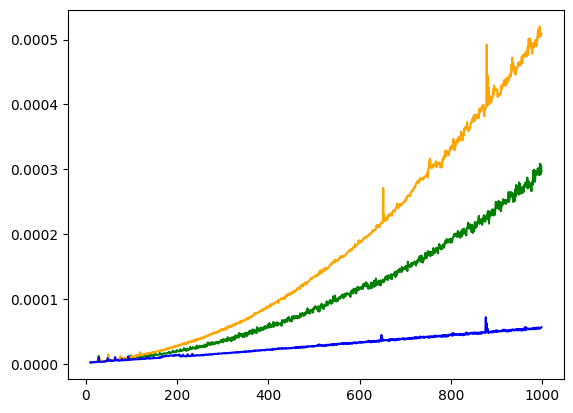

In [148]:
plt.plot(range_bounds, shell_sort_big_arr, color = "green")
plt.plot(range_bounds, shell_sort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, shell_sort_already_sorted_big_arr, color = "blue")

Сортування Шелла:
* Адаптивне (працює швидше якщо вхідні дані частково відсортовані, див. сортування вставкою)
* Нестабільне

Наступний алгоритм - merge sort. 

Асимптотична оцінка:

* Найгірший випадок: O(n*log(n))
* Найкращий випадок: O(n*log(n))
* Середній випадок: O(n*log(n))

[Народний танок](https://youtu.be/dENca26N6V4?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

З точки зору дизайну алгоритмів, сортування злиттям є еталонним прикладом техніки divide-and-conquer. Алгоритми цього типу складаються з трьох частин:

* Divide - розбити проблему на підчастини
* Conquer - вирішити проблему для кожної частини окремо
* Combine - зібрати загальне рішення з результатів попереднього етапу

In [149]:
from typing import List, TypeVar

T = TypeVar("T")


def merge_sort(arr: List[T]) -> None:
    """From the signature we know that our method does not return anything.
    Basically it performs the side effect: it sorts the variable arr and treats it as mutable"""
    if len(arr) > 1:
        mid_index: int = len(arr) // 2
        #DIVIDE
        left_subarray: List[T] = arr[:mid_index]
        right_subarray: List[T] = arr[mid_index:]
        #CONQUER
        merge_sort(left_subarray)
        merge_sort(right_subarray)
        #COMBINE
        merge(arr, left_subarray, right_subarray)


def merge(
    arr: List[T], left_subarray: List[T], right_subarray: List[T]
) -> None:
    # Two iterators for traversing the two halves
    left_pointer: int = 0
    right_pointer: int = 0

    # Iterator for the main list
    original_array_pointer: int = 0

    while left_pointer < len(left_subarray) and right_pointer < len(right_subarray):
        if left_subarray[left_pointer] <= right_subarray[right_pointer]:
            # The value from the left half has been used
            arr[original_array_pointer] = left_subarray[left_pointer]
            # Move the iterator forward
            left_pointer += 1
        else:
            arr[original_array_pointer] = right_subarray[right_pointer]
            # The value from right half has been used
            right_pointer += 1
        # Move to the next slot in main array
        original_array_pointer += 1

    # For all the remaining values in either left or right array
    # we perform merge as we know that they are greater than already merged values
    while left_pointer < len(left_subarray):
        arr[original_array_pointer] = left_subarray[left_pointer]
        left_pointer += 1
        original_array_pointer += 1

    while right_pointer < len(right_subarray):
        arr[original_array_pointer] = right_subarray[right_pointer]
        right_pointer += 1
        original_array_pointer += 1

In [150]:
random.shuffle(original_lst)
print(original_lst)
merge_sort(original_lst)
print(original_lst)

[178, 220, 290, 709, 7, 540, 891, 863, 847, 700, 187, 610, 932, 216, 240, 546, 585, 660, 536, 199, 707, 925, 498, 198, 771, 622, 170, 721, 115, 924, 361, 499, 838, 38, 160, 106, 264, 779, 507, 102, 497, 58, 414, 605, 667, 837, 983, 893, 505, 320, 827, 906, 854, 155, 147, 711, 464, 53, 42, 61, 917, 840, 855, 613, 824, 334, 473, 214, 930, 638, 587, 171, 813, 903, 383, 563, 389, 202, 377, 109, 403, 23, 306, 715, 50, 229, 281, 506, 126, 194, 618, 164, 694, 43, 475, 238, 176, 528, 737, 866, 80, 94, 307, 302, 720, 821, 931, 719, 512, 758, 780, 533, 774, 989, 384, 802, 408, 480, 175, 81, 786, 626, 532, 640, 469, 387, 428, 964, 75, 922, 959, 668, 354, 193, 951, 752, 111, 342, 145, 682, 517, 489, 98, 339, 338, 621, 235, 398, 646, 458, 884, 606, 576, 788, 225, 783, 510, 759, 735, 538, 542, 328, 909, 842, 440, 485, 26, 294, 291, 380, 236, 228, 41, 620, 763, 683, 118, 710, 59, 303, 987, 353, 994, 982, 736, 190, 592, 995, 500, 347, 956, 243, 402, 675, 8, 305, 205, 92, 898, 488, 509, 599, 578, 907, 

In [151]:
%%timeit

random.shuffle(original_lst)
merge_sort(original_lst)

1.25 ms ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [152]:
merge_sort_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)

In [153]:
merge_sort_reverse_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [154]:
merge_sort_already_sorted_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list)

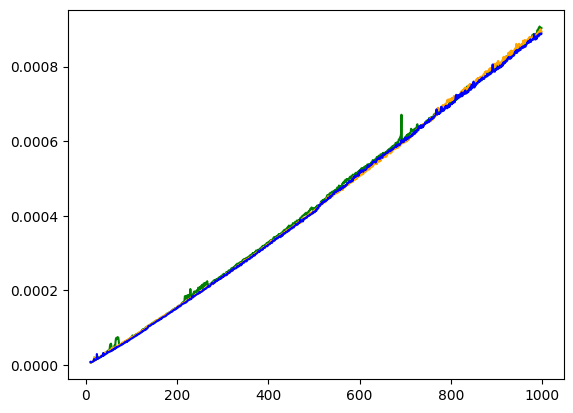

In [155]:
plt.plot(range_bounds, merge_sort_big_arr, color = "green")
plt.plot(range_bounds, merge_sort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, merge_sort_already_sorted_big_arr, color = "blue")

Властивості merge sort:

* Стабільність
* НЕ-inplace (O(n) додаткової спожитої пам'яті). In-place імплементації **теоретично** можливі, але вважаються занадто складними для реалізації

Існує теорема з доволі простим доведенням про верхню межу **кількості порівнянь** для будь якого comparison-based алгоритму сортування.
Ця верхня межа дорівнює **O(n*log(n))** (насправді, там використовується нотація Big Omega).

Це слідує з кількості можливих перестановок в масиві і побудованому дереві прийняття рішень (можемо розібрати, якщо цікаво).

Всі розглянуті в цьому уроці алгоритми сортування є comparison-based. 

З цієї теореми є наслідок: merge sort і heap sort (поза нашим розглядом) є **асимптотично оптимальними** порівняльними алгоритмами сортування, тому що їхній перфоманс **у найгіршому випадку** описується як О(n*log(n)).

Але це не значить, що merge sort або heapsort є **найшвидшими** алгоритмом у **середньому** та **найкращому** випадках. У найкращому випадку їх може "обігнати" insertion sort.

У середньому випадку існує як мінімум один comparison-based алгоритм, котрий фактично є швидшим від усі інші відомі порівняльні алгоритми. Він носить назву **quicksort**.

In [156]:
from random import choice

T = TypeVar("T")


def quicksort_not_inplace(arr: List[T]) -> List[T]:
    """This quicksort implementation is NOT IN PLACE. 
    It uses O(n) additional memory!!
    But it works really fast in Python and it's easy to implement"""
    if len(arr) == 0: 
        return list()
    pivot = arr[0]
    l = quicksort_not_inplace([x for x in arr[1:] if x < pivot])
    u = quicksort_not_inplace([x for x in arr[1:] if x >= pivot])
    return l + [pivot] + u


In [157]:
from typing import List, TypeVar
from random import randint

T = TypeVar("T")


def shuffle(arr: List[T]) -> None:
    """Simple implementation for Fisher-Yates shuffle algo"""
    array_length: int = len(arr)
    for index in range(array_length - 1, 0, -1):
        random_index: int = randint(0, index)
        arr[index], arr[random_index] = arr[random_index], arr[index]


def partition(arr, begin, end):
    pivot = begin
    for i in range(begin + 1, end + 1):
        if arr[i] <= arr[begin]:
            pivot += 1
            arr[i], arr[pivot] = arr[pivot], arr[i]
    arr[pivot], arr[begin] = arr[begin], arr[pivot]
    return pivot


def quicksort(arr, begin=0, end=None):
    shuffle(arr)
    if end is None:
        end = len(arr) - 1

    def _quicksort(arr, begin, end):
        if begin >= end:
            return
        pivot = partition(arr, begin, end)
        _quicksort(arr, begin, pivot - 1)
        _quicksort(arr, pivot + 1, end)

    return _quicksort(arr, begin, end)

Асимптотична оцінка:

* Найгірший випадок: O(n**2), в основному коли масив відсортований (у будь який бік)
* Найкращий випадок: O(n*log(n))
* Середній випадок: O(n*log(n))

* Додаткова пам'ять: O(log(n)), O(n) для наївної імплементації

[Народний танок](https://www.youtube.com/watch?v=3San3uKKHgg)

In [158]:
random.shuffle(original_lst)
print(original_lst)
print(quicksort_not_inplace(original_lst))

[643, 748, 860, 838, 585, 398, 634, 469, 199, 601, 769, 287, 778, 231, 990, 805, 30, 565, 704, 328, 696, 539, 473, 535, 211, 782, 232, 245, 326, 781, 381, 115, 646, 93, 57, 318, 407, 883, 182, 376, 418, 195, 400, 336, 731, 527, 427, 205, 218, 210, 958, 880, 204, 811, 362, 26, 8, 89, 996, 305, 633, 133, 477, 14, 228, 472, 945, 959, 20, 447, 198, 500, 760, 580, 972, 261, 814, 170, 458, 751, 884, 113, 155, 4, 27, 624, 823, 163, 795, 790, 159, 280, 363, 380, 264, 408, 762, 626, 794, 592, 891, 864, 530, 217, 146, 621, 763, 221, 90, 340, 15, 812, 566, 367, 105, 791, 285, 69, 862, 341, 623, 206, 720, 540, 420, 100, 404, 78, 852, 471, 630, 160, 661, 174, 382, 52, 654, 464, 951, 138, 334, 286, 1, 59, 109, 757, 924, 813, 425, 395, 330, 905, 974, 975, 615, 424, 599, 275, 579, 701, 806, 957, 39, 324, 939, 497, 610, 960, 175, 44, 135, 929, 399, 200, 526, 474, 724, 901, 728, 785, 294, 712, 375, 775, 223, 132, 154, 442, 252, 384, 980, 742, 679, 966, 86, 732, 870, 963, 62, 295, 759, 301, 674, 667, 713

In [159]:
random.shuffle(original_lst)
print(original_lst)
quicksort(original_lst)
print(original_lst)

[600, 341, 501, 246, 30, 579, 960, 687, 291, 386, 502, 474, 71, 218, 483, 605, 716, 874, 926, 68, 803, 686, 910, 203, 553, 499, 242, 916, 680, 457, 533, 416, 589, 125, 2, 364, 775, 133, 266, 406, 752, 433, 969, 908, 691, 209, 414, 33, 917, 201, 293, 496, 197, 472, 528, 240, 639, 402, 730, 807, 80, 326, 393, 73, 283, 317, 27, 32, 597, 818, 532, 511, 940, 88, 990, 705, 827, 59, 800, 785, 984, 480, 42, 606, 783, 779, 107, 900, 701, 897, 539, 13, 614, 89, 358, 736, 881, 859, 857, 95, 178, 615, 790, 732, 462, 407, 19, 883, 16, 739, 304, 23, 595, 867, 838, 3, 147, 651, 288, 302, 166, 694, 92, 66, 77, 64, 238, 862, 418, 901, 660, 50, 664, 270, 454, 627, 316, 964, 767, 556, 669, 222, 445, 439, 451, 150, 819, 903, 224, 383, 871, 271, 431, 190, 455, 781, 65, 692, 593, 773, 400, 588, 117, 703, 67, 346, 72, 731, 721, 360, 198, 186, 949, 319, 512, 643, 369, 437, 624, 759, 464, 756, 978, 858, 628, 83, 648, 275, 985, 272, 864, 484, 509, 516, 486, 793, 634, 181, 574, 828, 363, 20, 139, 82, 676, 514, 5

In [160]:
%%timeit

random.shuffle(original_lst)
merge_sort(original_lst)

1.26 ms ± 5.06 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [161]:
quicksort_big_arr: List[float] = time_algs_by_mean(quicksort_not_inplace, TESTS_NUM, range_bounds, list, shuffle_pure_func)

In [162]:
quicksort_big_arr_inplace: List[float] = time_algs_by_mean(quicksort, TESTS_NUM, range_bounds, list, shuffle_pure_func)

In [163]:
quicksort_reverse_big_arr: List[float] = time_algs_by_mean(quicksort_not_inplace, TESTS_NUM, range_bounds, list, reverse_arr)

In [164]:
quicksort_already_sorted_big_arr: List[float] = time_algs_by_mean(quicksort_not_inplace, TESTS_NUM, range_bounds, list)

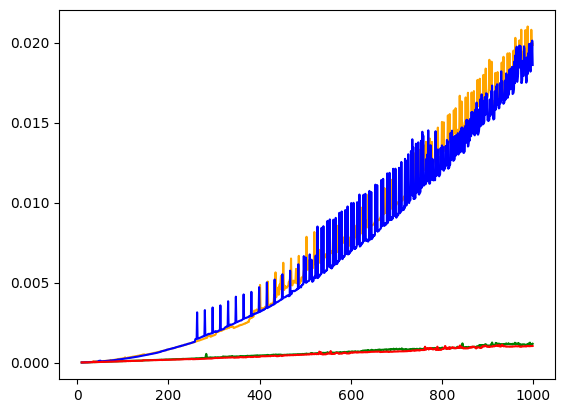

In [165]:
plt.plot(range_bounds, quicksort_big_arr, color = "green")
plt.plot(range_bounds, quicksort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, quicksort_already_sorted_big_arr, color = "blue")
plt.plot(range_bounds, quicksort_big_arr_inplace, color = "red")

Властивості:

* НЕ стабільний (але існують стабільні модифікації)
* In-place (не робить зайвих копій вхідних даних, хоча можливі не-in-place імплементації)
* Divide-and-conquer
* З урахуванням усіх констант є найшвидшим з comparison-based алгоритмів в **середньому** випадку **на нескінченності**